In [6]:
import cv2
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from PIL import Image
train=r"C:/Users/omara/originPNG"
cat=["healthypng","covidpng"]
single=r"C:/Users/omara/test"
cat_2=[]

data=[]
test=[]
Model="CT"
for i in cat:
    path=os.path.join(train,i)
    path_2=os.path.join(single,i)
    label=cat.index(i)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img_arr=cv2.imread(img_path,0)
        #img_arr = tf.reshape(img_arr, [-1, 256, 256, 3])
        #print(img_arr)
        #img_arr=tf.image.resize(img_arr, [256,256])#no need
        data.append([img_arr,label])
    for img in os.listdir(path_2):
        img_path=os.path.join(path_2,img)
        img_arr=cv2.imread(img_path,0)# will result in input shape(256,256) instead of (256,256,3)
        #img_arr=tf.image.resize(img_arr, [256,256])#no need 
        test.append([img_arr,label])     
shuffle(data)
shuffle(test)# no need in acutuality but to stay consistent
#print(len(data))
x=[]
y=[]
x_test=[]
y_test=[]
for features,labels in data:
    x.append(features)
    y.append(labels)
for features,labels in test:
    x_test.append(features)
    y_test.append(labels)
x_test=np.array(x_test)
y_test=np.array(y_test)
x=np.array(x)
y=np.array(y)

#pickle.dump(x,open("x.pkl",'wb'))
#pickle.dump(y,open("y.pkl",'wb'))
x=tf.keras.utils.normalize(x,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
x/=255
x_test/=255
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])#or 
model.fit(x,y,epochs=8,validation_split=0.1)

Epoch 1/8
50/50 [==============================] - 1s 16ms/step - loss: 0.6593 - accuracy: 0.6554 - val_loss: 0.3428 - val_accuracy: 0.8800
Epoch 2/8
50/50 [==============================] - 1s 12ms/step - loss: 0.1943 - accuracy: 0.9256 - val_loss: 0.1178 - val_accuracy: 0.9543
Epoch 3/8
50/50 [==============================] - 1s 12ms/step - loss: 0.0866 - accuracy: 0.9688 - val_loss: 0.3490 - val_accuracy: 0.8800
Epoch 4/8
50/50 [==============================] - 1s 12ms/step - loss: 0.0611 - accuracy: 0.9739 - val_loss: 0.0502 - val_accuracy: 0.9771
Epoch 5/8
50/50 [==============================] - 1s 12ms/step - loss: 0.0300 - accuracy: 0.9866 - val_loss: 0.0402 - val_accuracy: 0.9886
Epoch 6/8
50/50 [==============================] - 1s 13ms/step - loss: 0.0373 - accuracy: 0.9854 - val_loss: 0.0273 - val_accuracy: 0.9886
Epoch 7/8
50/50 [==============================] - 1s 13ms/step - loss: 0.0255 - accuracy: 0.9886 - val_loss: 0.0662 - val_accuracy: 0.9771
Epoch 8/8
50/50 [===

In [9]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
from prettytable import PrettyTable
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from keras.callbacks import EarlyStopping
from PIL import Image
import keras
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import pandas as pd
import statsmodels.api as sm
import pylab as pl

In [7]:
loss,win=model.evaluate(x_test,y_test)#evaluate on model full of covid cases for simplicity
#print(loss,win)
#print(np.argmax(predictions[0])) # varification
#plt.imshow(x[34],cmap=plt.cm.binary)#sample 34
#print(y[34])

7/7 [==============================] - 0s 7ms/step - loss: 1.1546 - accuracy: 0.7100


array([[[1.97779700e-05, 1.95184311e-05, 1.91442996e-05, ...,
         1.97109493e-05, 2.01283656e-05, 1.03038574e-05],
        [1.97779700e-05, 9.75921557e-06, 1.43582247e-05, ...,
         1.97109493e-05, 1.00641828e-05, 0.00000000e+00],
        [9.88898501e-06, 1.46388229e-05, 9.57214979e-06, ...,
         1.47832116e-05, 1.00641828e-05, 1.54557856e-05],
        ...,
        [1.48334775e-05, 9.75921557e-06, 4.78607490e-06, ...,
         1.47832116e-05, 2.01283656e-05, 2.06077148e-05],
        [2.96669550e-05, 3.41572559e-05, 2.87164494e-05, ...,
         2.46386862e-05, 1.50962742e-05, 2.57596421e-05],
        [1.97779700e-05, 9.75921557e-06, 1.43582247e-05, ...,
         2.95664231e-05, 2.51604579e-05, 2.06077148e-05]],

       [[1.38656478e-05, 9.06819878e-06, 1.33214271e-05, ...,
         9.87779549e-06, 3.04232526e-05, 1.03538614e-05],
        [1.84875298e-05, 9.06819878e-06, 8.88095110e-06, ...,
         1.97555910e-05, 5.07054210e-06, 5.17693070e-06],
        [1.38656478e-05, 

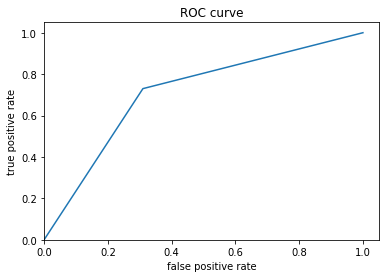

In [14]:
predict=model.predict([x_test])
singlepredict=np.argmax(predict,1)
fpr, tpr, _ = roc_curve(y_test, singlepredict)
auc_rf = auc(fpr, tpr)
print("auc =",auc_rf)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

True


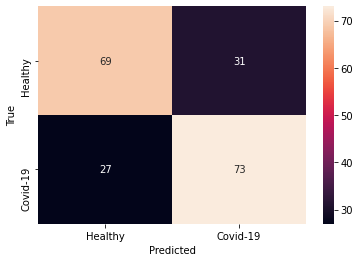

In [11]:
singlepredict=[]
singletest=[]
predict=model.predict([x_test]) # not the best way to get a some neat labels
tf.config.run_functions_eagerly(True)
print(tf.executing_eagerly())# If false then confusion.numpy will produce error

singlepredict=np.argmax(predict,1) # I forget what it does exactly or how it does it
singletest=np.array(y_test)
confusion=tf.math.confusion_matrix(labels=singletest, predictions=singlepredict).numpy()
#plt.imshow(confusion) # Green Confusion Matrix
sns.heatmap(confusion , annot=True , xticklabels=['Healthy' , 'Covid-19'] , yticklabels=['Healthy' , 'Covid-19'],fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()